# Air Quality Data Analysis & Prediction Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load data
df = pd.read_csv("Air_Quality_Data.csv")

## Forecast Line Chart

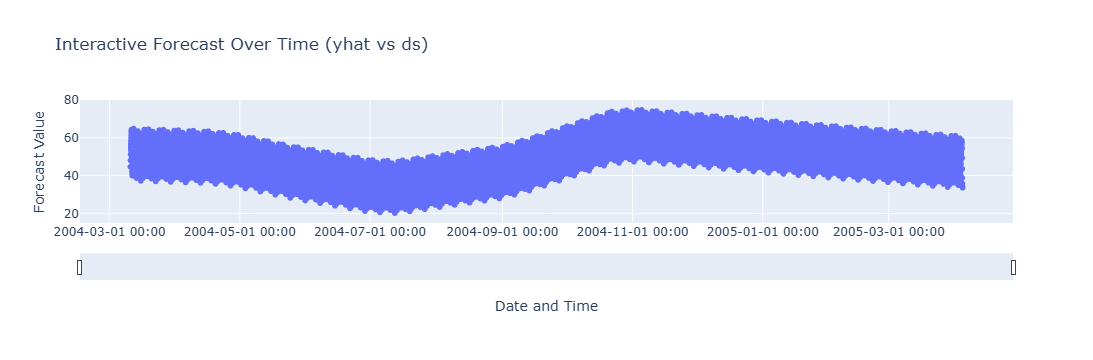

In [2]:
# Visualize Line Chart where purpose is to plot yhat vs ds (forecast over time):

import pandas as pd
import plotly.express as px

# Load dataset
df = pd.read_csv("Air_Quality_Data.csv")
df['ds'] = pd.to_datetime(df['ds'])

# Create the interactive line chart
fig = px.line(
    df,
    x='ds',
    y='yhat',
    title='Interactive Forecast Over Time (yhat vs ds)',
    labels={'ds': 'Date and Time', 'yhat': 'Forecast Value'},
    markers=True
)

# Update hover to show full datetime
fig.update_traces(hovertemplate='Date & Time: %{x|%Y-%m-%d %H:%M:%S}<br>yhat: %{y:.2f}')

# Update layout to improve axis formatting
fig.update_layout(
    hovermode='x unified',
    xaxis=dict(
        rangeslider_visible=True,
        tickformat='%Y-%m-%d %H:%M',  # Show both date and time on axis
        title='Date and Time'
    ),
    yaxis=dict(
        title='Forecast Value',
        fixedrange=False
    )
)

# Save the chart as an image
fig.write_image("forecast_line_chart.png")

# Show the chart
fig.show()

## Uncertainty Band Chart

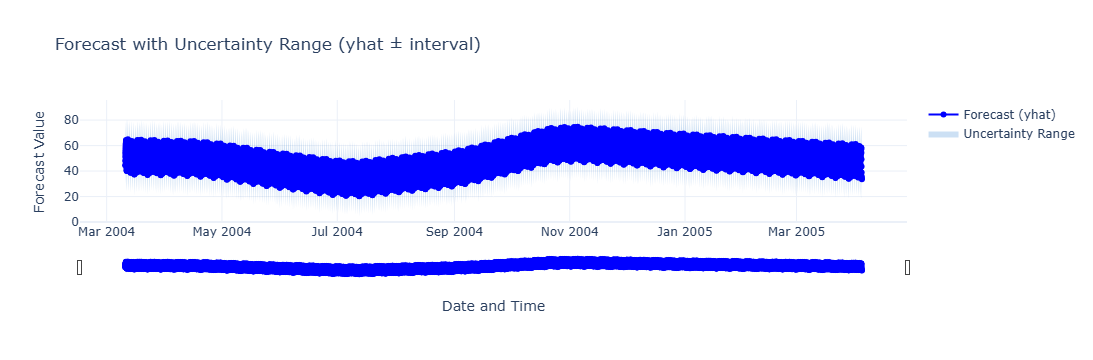

In [5]:
# Visualize Area Chart: where purpose is to show uncertainty range using yhat_lower and yhat_upper

import pandas as pd
import plotly.graph_objects as go

# Load dataset
df = pd.read_csv("Air_Quality_Data.csv")
df['ds'] = pd.to_datetime(df['ds'])

# Create figure
fig = go.Figure()

# Add uncertainty range as filled area between yhat_upper and yhat_lower
fig.add_traces([
    go.Scatter(
        x=df['ds'],
        y=df['yhat_upper'],
        mode='lines',
        name='Upper Bound',
        line=dict(width=0),
        showlegend=False
    ),
    go.Scatter(
        x=df['ds'],
        y=df['yhat_lower'],
        mode='lines',
        name='Uncertainty Range',
        fill='tonexty',  # Fill area between this trace and the one before
        fillcolor='rgba(0,100,200,0.2)',
        line=dict(width=0),
        showlegend=True
    )
])

# Add central forecast line
fig.add_trace(
    go.Scatter(
        x=df['ds'],
        y=df['yhat'],
        mode='lines+markers',
        name='Forecast (yhat)',
        line=dict(color='blue')
    )
)

# Update layout
fig.update_layout(
    title='Forecast with Uncertainty Range (yhat ± interval)',
    xaxis_title='Date and Time',
    yaxis_title='Forecast Value',
    hovermode='x unified',
    xaxis=dict(rangeslider_visible=True),
    template='plotly_white'
)

# Save Image
fig.write_image("uncertainty_area_chart.png")

# Show figure
fig.show()

## Forecast vs Actual Comparison:

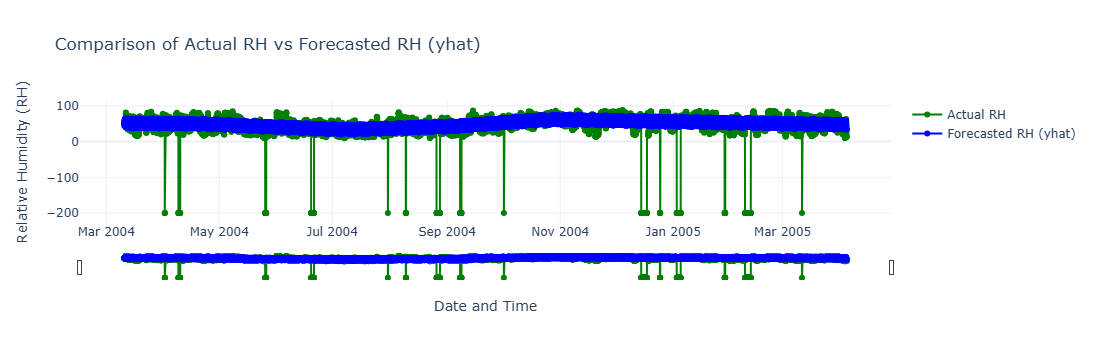

In [10]:
# Visualize Comparison Chart: where purpose is to compare rh (Actual RH) vs yhat

import pandas as pd
import plotly.graph_objects as go

# Load dataset
df = pd.read_csv("Air_Quality_Data.csv")
df['ds'] = pd.to_datetime(df['ds'])

# Create figure
fig = go.Figure()

# Add actual RH (ground truth)
fig.add_trace(
    go.Scatter(
        x=df['ds'],
        y=df['rh'],
        mode='lines+markers',
        name='Actual RH',
        line=dict(color='green')
    )
)

# Add forecasted RH (yhat)
fig.add_trace(
    go.Scatter(
        x=df['ds'],
        y=df['yhat'],
        mode='lines+markers',
        name='Forecasted RH (yhat)',
        line=dict(color='blue')
    )
)

# Update layout
fig.update_layout(
    title='Comparison of Actual RH vs Forecasted RH (yhat)',
    xaxis_title='Date and Time',
    yaxis_title='Relative Humidity (RH)',
    hovermode='x unified',
    xaxis=dict(rangeslider_visible=True),
    template='plotly_white'
)

# Save Image:
fig.write_image("rh_vs_yhat_comparison_chart.png")

# Show figure
fig.show()

## Key Metrics

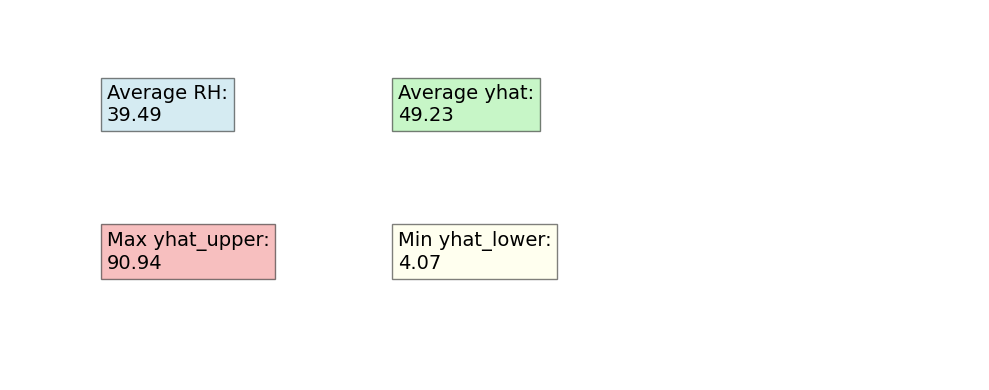

In [13]:
# Visualize Cards, where purpose is to display key metrics:

import matplotlib.pyplot as plt

# Calculate metrics
avg_rh = df['rh'].mean()
avg_yhat = df['yhat'].mean()
max_yhat_upper = df['yhat_upper'].max()
min_yhat_lower = df['yhat_lower'].min()

# Create a blank figure
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('off')  # Hide axes

# Display text boxes (simulating cards)
ax.text(0.1, 0.7, f'Average RH:\n{avg_rh:.2f}', fontsize=14, bbox=dict(facecolor='lightblue', alpha=0.5))
ax.text(0.4, 0.7, f'Average yhat:\n{avg_yhat:.2f}', fontsize=14, bbox=dict(facecolor='lightgreen', alpha=0.5))
ax.text(0.1, 0.3, f'Max yhat_upper:\n{max_yhat_upper:.2f}', fontsize=14, bbox=dict(facecolor='lightcoral', alpha=0.5))
ax.text(0.4, 0.3, f'Min yhat_lower:\n{min_yhat_lower:.2f}', fontsize=14, bbox=dict(facecolor='lightyellow', alpha=0.5))

plt.tight_layout()

# 🔽 Save the figure as a PNG image
plt.savefig("key_metrics_cards.png", dpi=300, bbox_inches='tight')

plt.show()